In [1]:
import os 
from ipsl_dataset import IPSL_DCPP
import torch
import numpy as np
import hydra
from ipsl_dataset import surface_variables,plev_variables
from hydra import compose, initialize
from omegaconf import OmegaConf
with initialize(version_base=None, config_path="conf"):
    cfg = compose(config_name="config",overrides=["experiment=one_month_full_variable_a100"])

In [2]:
test = IPSL_DCPP('test',lead_time_months=1)
test_dataloader = torch.utils.data.DataLoader(test,batch_size=1,shuffle=False)


In [3]:
import pickle
pkl_file = open('gpp_avgs.pkl', 'rb')
gpp_data = pickle.load(pkl_file)


In [4]:
avged = []
import numpy as np
for day in gpp_data:
    avged.append(np.stack(day).mean(axis=0))

In [8]:
np.save('ggp_averages',np.stack(avged))

MovieWriter ffmpeg unavailable; using Pillow instead.


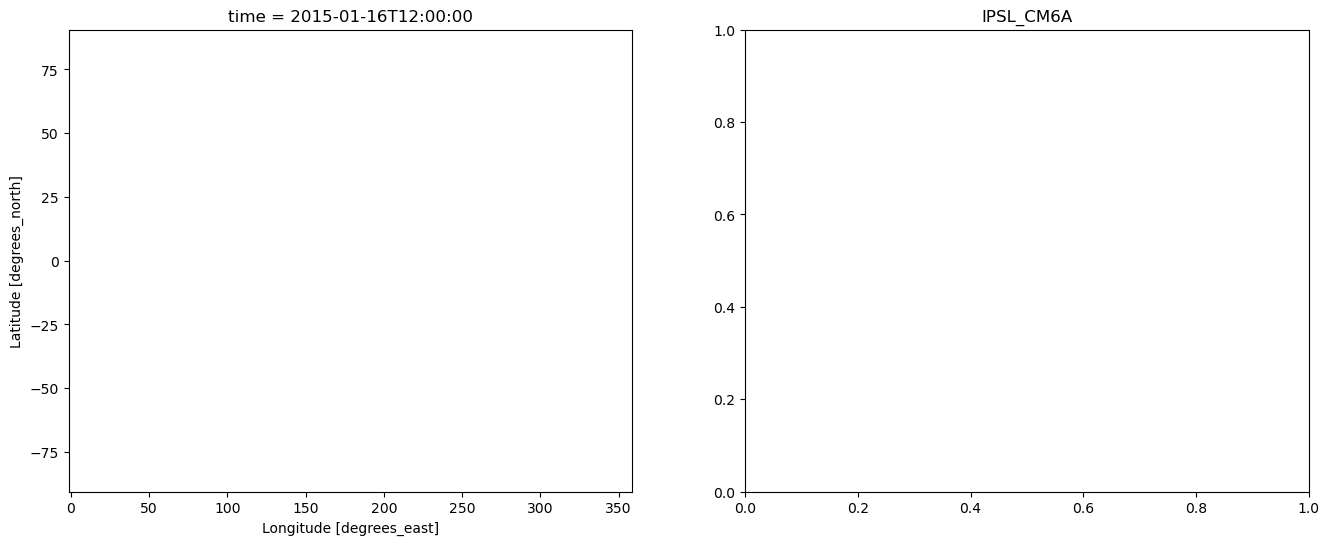

In [23]:
#gif of rollout
# Plotting ---
import matplotlib.pyplot as plt
#import seaborn
from celluloid import Camera

# seaborn.set_context("paper")
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 6))
camera = Camera(fig)
ax1.set_title("predicted")
ax2.set_title("IPSL_CM6A")
import xarray as xr
ds = xr.open_dataset(test.files[0])
shell = ds.isel(time=0)
surface_var_name = 'gpp'

# Animate plot over time
for time_step in range(117):
    #ax1.plot(predicted[time_step])
    shell[surface_var_name].data = avged[time_step]
    shell[surface_var_name].plot.pcolormesh(ax=ax1,add_colorbar=False)
#     shell[surface_var_name].data = climate_model[time_step]

#     shell[surface_var_name].plot.pcolormesh(ax=ax2,add_colorbar=False)
    #ax2.plot(climate_model[time_step])
    camera.snap()
anim = camera.animate()
anim.save(f"gpp_avg_rollout.gif")

In [33]:
#take difference of each ensemble vs the mean
test_it = iter(test_dataloader)
surface_var_name = 'gpp'
var_index = surface_variables.index(surface_var_name)
gpps = []
for i in range(117):
    batch = next(test_it)
    gpps.append(batch['state_surface'].squeeze()[var_index])
    

In [34]:
single_avg = np.stack(gpps)

117

In [35]:
global_avg = np.stack(avged)

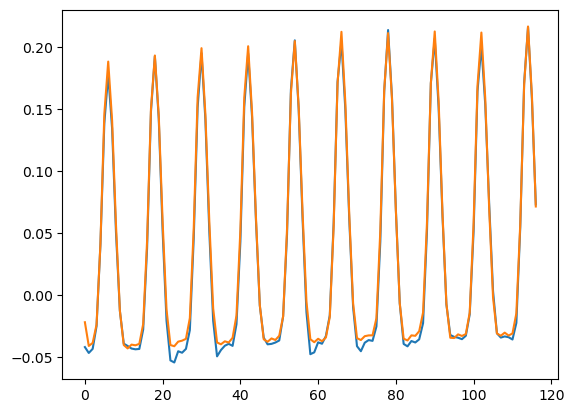

In [36]:
import matplotlib.pyplot as plt 

plt.plot(single_avg.mean(axis=(1,2)))
plt.plot(global_avg.mean(axis=(1,2)))

In [22]:
single_avg.mean(axis=(1,2)) - global_avg.mean(axis=(1,2))

array([-2.47704349e-02, -2.34370679e-03,  1.35631692e-02,  6.46644533e-02,
        9.69142690e-02,  3.19820493e-02, -5.39398938e-02, -9.03067589e-02,
       -6.92099109e-02, -2.67070606e-02, -7.49334693e-04, -1.11311674e-04,
       -3.77798826e-03, -2.93626636e-03,  1.16472058e-02,  6.10956550e-02,
        1.04364961e-01,  4.23649997e-02, -5.09531498e-02, -9.32685733e-02,
       -7.96930119e-02, -4.10008058e-02, -1.40417255e-02, -4.03634086e-03,
       -8.92975926e-03, -6.61781430e-03,  7.10111111e-03,  6.43501654e-02,
        9.71726477e-02,  3.57098132e-02, -5.77113628e-02, -9.38611329e-02,
       -8.06704611e-02, -3.86580527e-02, -6.13178313e-03, -1.16102770e-03,
       -2.02096626e-03, -2.71392986e-03,  1.10419821e-02,  5.94757125e-02,
        9.95272174e-02,  3.54203284e-02, -5.68008423e-02, -8.66628885e-02,
       -7.16990307e-02, -2.62068063e-02, -4.04357538e-03, -1.70752779e-03,
       -3.29618156e-03, -4.03787941e-04,  1.57261062e-02,  6.59444481e-02,
        1.12451702e-01,  